<a href="https://colab.research.google.com/github/sheylacantalupo/Analysis-BDBI/blob/main/PRF_acidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
dados = pd.read_csv('datatran2022.csv', encoding='latin-1', sep = ';')
dados.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,2022-01-01,sábado,01:35:00,PI,316.0,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,1,0,1,2,"-7,43280012",-40.682619,SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,2022-01-01,sábado,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,...,0,0,0,1,1,"-25,114403",-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,2022-01-01,sábado,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,1,0,1,2,"-21,228445",-54.456296,SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,2022-01-01,sábado,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,...,1,1,0,1,2,"-23,03149804",-44.177153,SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,2022-01-01,sábado,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,0,3,0,0,1,"-19,76061249",-44.134754,SPRF-MG,DEL02-MG,UOP01-DEL02-MG


In [7]:
dados.shape

(42070, 30)

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42070 entries, 0 to 42069
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      42070 non-null  int64  
 1   data_inversa            42070 non-null  object 
 2   dia_semana              42070 non-null  object 
 3   horario                 42070 non-null  object 
 4   uf                      42070 non-null  object 
 5   br                      41932 non-null  float64
 6   km                      41932 non-null  object 
 7   municipio               42070 non-null  object 
 8   causa_acidente          42070 non-null  object 
 9   tipo_acidente           42070 non-null  object 
 10  classificacao_acidente  42070 non-null  object 
 11  fase_dia                42070 non-null  object 
 12  sentido_via             42070 non-null  object 
 13  condicao_metereologica  42070 non-null  object 
 14  tipo_pista              42070 non-null

In [9]:
dados_renomeado = dados.rename(columns = {"uop":"unidade_operacional_policiamento", "data_inversa":"data"})

In [10]:
dados_renomeado['data'] = pd.to_datetime(dados_renomeado['data'])

In [11]:
dados_renomeado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42070 entries, 0 to 42069
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                42070 non-null  int64         
 1   data                              42070 non-null  datetime64[ns]
 2   dia_semana                        42070 non-null  object        
 3   horario                           42070 non-null  object        
 4   uf                                42070 non-null  object        
 5   br                                41932 non-null  float64       
 6   km                                41932 non-null  object        
 7   municipio                         42070 non-null  object        
 8   causa_acidente                    42070 non-null  object        
 9   tipo_acidente                     42070 non-null  object        
 10  classificacao_acidente            42070 non-nu

In [12]:
exemplo = dados_renomeado["data"][0].day
exemplo

1

In [13]:
# verificar a existência de dados nulos
dados_renomeado.isnull().sum()

id                                    0
data                                  0
dia_semana                            0
horario                               0
uf                                    0
br                                  138
km                                  138
municipio                             0
causa_acidente                        0
tipo_acidente                         0
classificacao_acidente                0
fase_dia                              0
sentido_via                           0
condicao_metereologica                0
tipo_pista                            0
tracado_via                           0
uso_solo                              0
pessoas                               0
mortos                                0
feridos_leves                         0
feridos_graves                        0
ilesos                                0
ignorados                             0
feridos                               0
veiculos                              0


In [14]:
dados_renomeado["regional"]  = dados_renomeado["regional"].fillna("N/A")
dados_renomeado["delegacia"]  = dados_renomeado["delegacia"].fillna("N/A")
dados_renomeado["unidade_operacional_policiamento"]  = dados_renomeado["unidade_operacional_policiamento"].fillna("N/A")

In [15]:
dados_renomeado["br"]  = dados_renomeado["br"].fillna("N/A")
dados_renomeado["km"]  = dados_renomeado["km"].fillna("N/A")

In [16]:
dados_renomeado.isnull().sum()

id                                  0
data                                0
dia_semana                          0
horario                             0
uf                                  0
br                                  0
km                                  0
municipio                           0
causa_acidente                      0
tipo_acidente                       0
classificacao_acidente              0
fase_dia                            0
sentido_via                         0
condicao_metereologica              0
tipo_pista                          0
tracado_via                         0
uso_solo                            0
pessoas                             0
mortos                              0
feridos_leves                       0
feridos_graves                      0
ilesos                              0
ignorados                           0
feridos                             0
veiculos                            0
latitude                            0
longitude   

In [17]:
acidente_regiao = dados_renomeado.groupby(["uf", "classificacao_acidente"]).sum()
acidente_regiao

id  pessoas  mortos  feridos_leves  \
uf classificacao_acidente                                              
AC Com Vítimas Fatais        3140110       37      11              9   
   Com Vítimas Feridas      52198376      284       0            122   
   Sem Vítimas               8755584       57       0              0   
AL Com Vítimas Fatais       13642936       78      32              8   
   Com Vítimas Feridas     123321204      648       0            307   
...                              ...      ...     ...            ...   
SP Com Vítimas Feridas     971187319     5285       0           2431   
   Sem Vítimas             221741736      989       0              0   
TO Com Vítimas Fatais       23127925      185      57             59   
   Com Vítimas Feridas     109046829      650       0            269   
   Sem Vítimas              33181682      232       0              0   

                           feridos_graves  ilesos  ignorados  feridos  \
uf classificacao_acidente                                               
AC Com Vítimas Fatais                   1       8          8       10   
   Com Vítimas Feridas                 57      95         10      179   
   Sem Vítimas                          0      55          2        0   
AL Com Vítimas Fatais                  11      17         10       19   
   Com Vítimas Feridas                117     190         34      424   
...                                   ...     ...        ...      ...   
SP Com Vítimas Feridas                458    2083        313     2889   
   Sem Vítimas                          0     857        132        0   
TO Com Vítimas Fatais                  14      37         18       73   
   Com Vítimas Feridas                104     249         28      373   
   Sem Vítimas                          0     208         24        0   

                           veiculos      longitude  
uf classificacao_acidente                           
AC Com Vítimas Fatais            12    -475.127921  
   Com Vítimas Feridas          193   -8076.134761  
   Sem Vítimas                   42   -1361.062631  
AL Com Vítimas Fatais            52   -1131.744481  
   Com Vítimas Feridas          413  -10087.216092  
...                             ...            ...  
SP Com Vítimas Feridas         3737 -102697.052890  
   Sem Vítimas                  805  -23566.509537  
TO Com Vítimas Fatais            96   -2521.773153  
   Com Vítimas Feridas          392  -11943.522842  
   Sem Vítimas                  117   -3690.146584  

[81 rows x 10 columns]

In [18]:
acidente_regiao = dados_renomeado.groupby(["uf", "classificacao_acidente"])["classificacao_acidente"].count().reset_index(name="quantidade")
acidente_regiao

,uf,classificacao_acidente,quantidade
0,AC,Com Vítimas Fatais,7
1,AC,Com Vítimas Feridas,119
2,AC,Sem Vítimas,20
3,AL,Com Vítimas Fatais,31
4,AL,Com Vítimas Feridas,278
...,...,...,...
76,SP,Com Vítimas Feridas,2197
77,SP,Sem Vítimas,503
78,TO,Com Vítimas Fatais,52
79,TO,Com Vítimas Feridas,246


In [23]:
# gráfico de barras 
fig_1 = px.bar(acidente_regiao, x= "uf", y = "quantidade", hover_data=["classificacao_acidente"], color = "quantidade" )
fig_1.show()

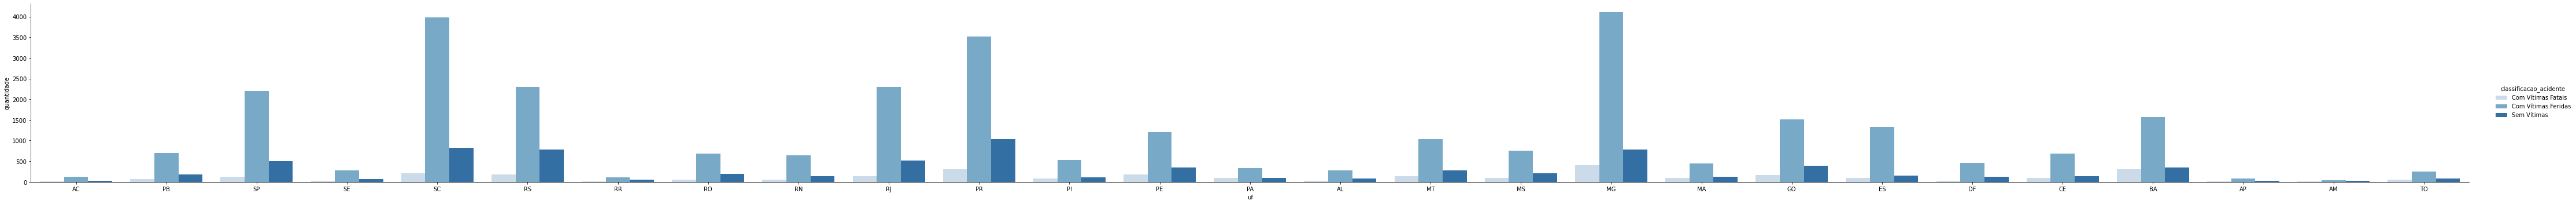

In [39]:
# gráfico de barras agrupadas
sns.catplot(data = acidente_regiao, x = "uf", y = "quantidade", hue = "classificacao_acidente", order = acidente_regiao["uf"].value_counts().index, kind = "bar",
        aspect = 12, palette = "Blues", col_order= "classificacao_acidente" )